In [1]:
from datasets import load_dataset

raw_dataset = load_dataset("ilsilfverskiold/traffic-camera-norway-images")


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alexi\.cache\huggingface\hub\datasets--ilsilfverskiold--traffic-camera-norway-images. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode 

In [2]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch


model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

image = raw_dataset['train'][12]['image']

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes
vehicules_list = [3,4,6,8]

count = 0

# print results
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for label in results['labels']:
    object_name = model.config.id2label[label.item()]
    print(object_name)
    if label.item() in vehicules_list:
        count += 1

print('num carros: ', count)


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alexi\.cache\huggingface\hub\models--hustvl--yolos-tiny. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you e

car
car
car
car
car
car
num carros:  6


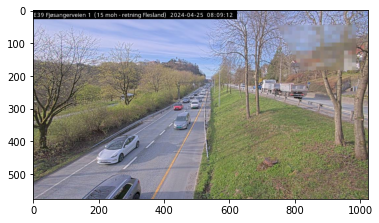

In [3]:
import matplotlib.pyplot as plt

image = raw_dataset['train'][12]['image']

plt.imshow(image)

In [4]:
for id, label in model.config.id2label.items():
  print(f'{id} = {label}') #3,4,6,8

0 = N/A
1 = person
2 = bicycle
3 = car
4 = motorcycle
5 = airplane
6 = bus
7 = train
8 = truck
9 = boat
10 = traffic light
11 = fire hydrant
12 = N/A
13 = stop sign
14 = parking meter
15 = bench
16 = bird
17 = cat
18 = dog
19 = horse
20 = sheep
21 = cow
22 = elephant
23 = bear
24 = zebra
25 = giraffe
26 = N/A
27 = backpack
28 = umbrella
29 = N/A
30 = N/A
31 = handbag
32 = tie
33 = suitcase
34 = frisbee
35 = skis
36 = snowboard
37 = sports ball
38 = kite
39 = baseball bat
40 = baseball glove
41 = skateboard
42 = surfboard
43 = tennis racket
44 = bottle
45 = N/A
46 = wine glass
47 = cup
48 = fork
49 = knife
50 = spoon
51 = bowl
52 = banana
53 = apple
54 = sandwich
55 = orange
56 = broccoli
57 = carrot
58 = hot dog
59 = pizza
60 = donut
61 = cake
62 = chair
63 = couch
64 = potted plant
65 = bed
66 = N/A
67 = dining table
68 = N/A
69 = N/A
70 = toilet
71 = N/A
72 = tv
73 = laptop
74 = mouse
75 = remote
76 = keyboard
77 = cell phone
78 = microwave
79 = oven
80 = toaster
81 = sink
82 = refri